# Industry 4.0 의 중심, BigData

<div align='right'><font size=2 color='gray'>Data Processing Based Python @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, [김진수](bigpycraft@gmail.com)</font></div>
<hr>

# Pandas Basics II

In [1]:
# Pandas Basics
from images import bigpycraft_bda as bpc
from IPython.display import Image 

from pandas import Series, DataFrame
import pandas as pd
import numpy as np

## 2. Essential functionality
> 핵심 기능 : Series나 DataFrame에 저장된 데이터를 다루는 방법
> - Reindexing
> - Dropping entries from an axis
> - Indexing, selection, and filtering
> - Arithmetic and data alignment
> - Function application and mapping
> - Sorting and ranking

### <font color='brown'>Reindexing</font>

In [2]:
obj = Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [3]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [4]:
obj.reindex(['a', 'b', 'c', 'd', 'e'], fill_value=0)

a   -5.3
b    7.2
c    3.6
d    4.5
e    0.0
dtype: float64

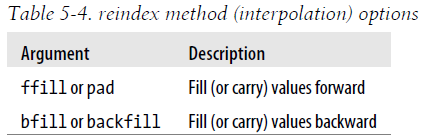

In [5]:
# reindex 메소드(보간) 옵션
Image(bpc.Table5_4, width=300)

In [6]:
# ffill 메소드 : 앞의 값으로 누락된 값을 채워 넣기
obj3 = Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3.reindex(range(6), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [7]:
# bfill 메소드 : 뒤의 값으로 누락된 값을 채워 넣기
obj3 = Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3.reindex(range(6), method='bfill')

0      blue
1    purple
2    purple
3    yellow
4    yellow
5       NaN
dtype: object

In [8]:
frame = DataFrame(np.arange(9).reshape((3, 3)), index=['a', 'c', 'd'],
                  columns=['Ohio', 'Texas', 'California'])
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [9]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [10]:
states = ['Texas', 'Utah', 'California']
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


In [11]:
frame.reindex(index=['a', 'b', 'c', 'd'], columns=states)

,Texas,Utah,California
a,1.0,NaN,2.0
b,NaN,NaN,NaN
c,4.0,NaN,5.0
d,7.0,NaN,8.0


In [12]:
frame.loc[['a', 'b', 'c', 'd'], states]

,Texas,Utah,California
a,1.0,NaN,2.0
b,NaN,NaN,NaN
c,4.0,NaN,5.0
d,7.0,NaN,8.0


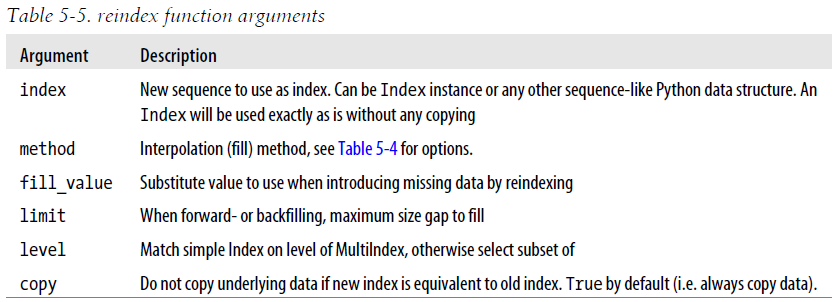

In [13]:
# 재색인 함수 인자
Image(bpc.Table5_5, width=600)

### <font color='brown'>Dropping entries from an axis</font>
> 하나의 로우 또는 칼럼 삭제하기
- 색인 배열 또는 삭제하려는 로우나 칼럼이 제외된 리스트를 이미 가지고 있다면 쉽게 삭제 가능한데...
- 이 방법은 데이터의 모양을 변경하는 작업이 필요하다.
- drop 메소드를 사용하면 선택한 값이 삭제된 새로운 객체를 얻을 수 있다.
<font color='green'>
- 칼럼 삭제 : drop( [칼럼명], axis=1)
- 로우 삭제 : drop( [로우명], axis=0) or drop( [로우명] ) 
</font>

In [14]:
obj = Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
new_obj = obj.drop('c')
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [15]:
obj.drop(['d', 'c'])

a    0.0
b    1.0
e    4.0
dtype: float64

In [16]:
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [17]:
data = DataFrame(np.arange(16).reshape((4, 4)),
                 index=['Ohio', 'Colorado', 'Utah', 'New York'],
                 columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [18]:
data.drop(['Colorado', 'Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


#### <font color='brown'> [Note]   axis=1 denotes that we are referring to a column, not a row </font>

In [19]:
data.drop('two', axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [20]:
data.drop(['two', 'four'], axis=1)

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


### <font color='brown'>Indexing, selection, and filtering</font>
> 색인하기, 선택하기, 거르기
- Series의 색인(obj[...])은 NumPy 배열의 색인과 유사하게 동작하는데,
- Series의 색인은 정수가 아니어도 된다는 점이 다르다.
- 또한 라벨이름으로 슬라이싱하는 것은 시작점과 끝점을 포함한다는 것이 파이썬과 다른점이다.

In [21]:
obj = Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [22]:
obj['b']

1.0

In [23]:
obj[1]

1.0

In [24]:
obj[2:4]

c    2.0
d    3.0
dtype: float64

In [25]:
obj[['b', 'a', 'd']]

b    1.0
a    0.0
d    3.0
dtype: float64

In [26]:
obj[[1, 3]]

b    1.0
d    3.0
dtype: float64

In [27]:
obj[obj < 2]

a    0.0
b    1.0
dtype: float64

#### <font color='green'>라벨이름으로 슬라이싱 할 경우, 끝점도 포함한다.</font>

In [28]:
obj['b':'c']

b    1.0
c    2.0
dtype: float64

In [29]:
obj['b':'c'] = 5
obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

In [30]:
data = DataFrame(np.arange(16).reshape((4, 4)),
                 index=['Ohio', 'Colorado', 'Utah', 'New York'],
                 columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [31]:
data['two']

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int32

In [32]:
data[['three', 'one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


In [33]:
data[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [34]:
data[data['three'] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [35]:
# 요건 문법적으로 모순이 있으나, 실용성에 기인한 것일뿐
data < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [36]:
data[data < 5] = 0

In [37]:
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [38]:
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int32

In [39]:
data.ix[['Colorado', 'Utah'], [3, 0, 1]]

C:\Python\Anaconda3-50\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,four,one,two
Colorado,7,0,5
Utah,11,8,9


In [40]:
data.ix[2]

one       8
two       9
three    10
four     11
Name: Utah, dtype: int32

In [41]:
data.ix[:'Utah', 'two']

Ohio        0
Colorado    5
Utah        9
Name: two, dtype: int32

In [42]:
data.ix[data.three > 5, :3]

,one,two,three
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


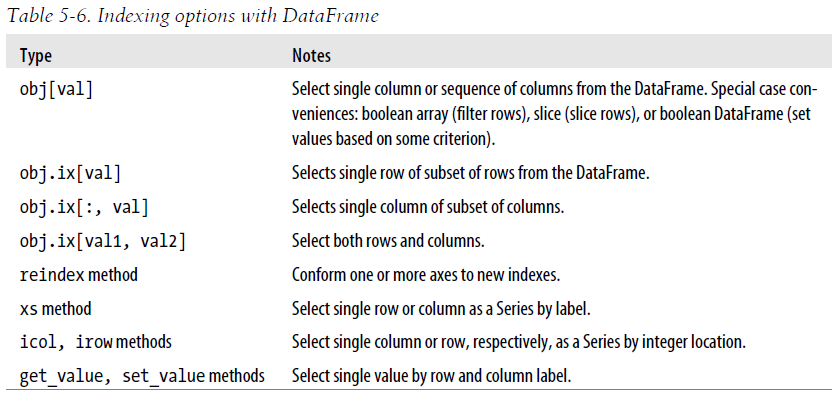

In [43]:
# DataFrame의 값 선택하기
Image(bpc.Table5_6, width=600)

### <font color='brown'>Arithmetic and data alignment</font>
> 산술연산과 데이터 정렬
- pandas 에서 중요한 기능은 색인이 다른 객체 간의 산술연산이다.
- 객체를 더할 때 짝이 맞지 않는 색인이 있다면 결과에 두 색인이 통합된다.

In [44]:
s1 = Series([ 7.3, -2.5, 3.4, 1.5],    index=['a', 'c', 'd', 'e'])
s2 = Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])

In [45]:
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [46]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [47]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [48]:
df1 = DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                index=['Ohio', 'Texas', 'Colorado'])
df2 = DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [49]:
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [50]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [51]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


#### Arithmetic methods with fill values
> 산술연산 메소드에 채워 넣을 값 지정하기

In [52]:
df1 = DataFrame(np.arange(12.).reshape((3, 4)), columns=list('abcd'))
df2 = DataFrame(np.arange(20.).reshape((4, 5)), columns=list('abcde'))

In [53]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [54]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [55]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,11.0,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [56]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,11.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [57]:
df1.reindex(columns=df2.columns, fill_value=0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


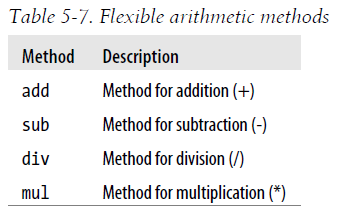

In [58]:
# 산술연산 메소드
Image(bpc.Table5_7, width=250)

#### Operations between DataFrame and Series
> DataFrame과 Series 간의 연산

In [59]:
arr = np.arange(12.).reshape((3, 4))
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [60]:
arr[0]

array([0., 1., 2., 3.])

In [61]:
arr - arr[0]

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

In [62]:
frame = DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                  index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [63]:
series = frame.iloc[0]
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [64]:
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


In [65]:
series2 = Series(range(3), index=['b', 'e', 'f'])
series2

b    0
e    1
f    2
dtype: int32

In [66]:
frame + series2

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


In [67]:
series3 = frame['d']
series3

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [68]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [69]:
frame.sub(series3, axis=0)

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


### <font color='brown'> Function application and mapping </font>
>  함수 적용과 매핑
> - pandas 객체에도 NumPy의 유니버설 함수를 적용할 수 있다.
> - 유니버설 함수 : 배열의 각 원소에 적용되는 메소드

In [70]:
frame = DataFrame(np.random.randn(4, 3), columns=list('bde'),
                  index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [71]:
frame

,b,d,e
Utah,1.056115,0.867512,1.370779
Ohio,-0.535711,-1.246486,-2.185357
Texas,-0.386328,-1.228566,-1.601029
Oregon,1.574897,0.457937,-0.790390


In [72]:
np.abs(frame)

,b,d,e
Utah,1.056115,0.867512,1.370779
Ohio,0.535711,1.246486,2.185357
Texas,0.386328,1.228566,1.601029
Oregon,1.574897,0.457937,0.790390


In [73]:
f = lambda x: x.max() - x.min()

In [74]:
frame.apply(f)

b    2.110608
d    2.113998
e    3.556136
dtype: float64

In [75]:
frame.apply(f, axis=1)

Utah      0.503267
Ohio      1.649647
Texas     1.214701
Oregon    2.365287
dtype: float64

In [76]:
def f(x):
    return Series([x.min(), x.max()], index=['min', 'max'])

frame.apply(f)

,b,d,e
min,-0.535711,-1.246486,-2.185357
max,1.574897,0.867512,1.370779


In [77]:
# 실수값을 문자열 포맷으로 변환
format = lambda x: '%.2f' % x
frame.applymap(format)

,b,d,e
Utah,1.06,0.87,1.37
Ohio,-0.54,-1.25,-2.19
Texas,-0.39,-1.23,-1.60
Oregon,1.57,0.46,-0.79


In [78]:
frame['e'].map(format)

Utah       1.37
Ohio      -2.19
Texas     -1.60
Oregon    -0.79
Name: e, dtype: object

### <font color='brown'> Sorting and ranking </font>
> 정렬과 순위

In [79]:
obj = Series(range(4), index=['d', 'a', 'b', 'c'])
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int32

In [80]:
frame = DataFrame(np.arange(8).reshape((2, 4)), index=['three', 'one'],
                  columns=['d', 'a', 'b', 'c'])
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [81]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [82]:
frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [83]:
obj = Series([4, 7, -3, 2])
# obj.order()
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

In [84]:
obj = Series([4, np.nan, 7, np.nan, -3, 2])
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

In [85]:
frame = DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame

,a,b
0,0,4
1,1,7
2,0,-3
3,1,2


In [86]:
# frame.sort_index(by='b')
frame.sort_values(by='b')

,a,b
2,0,-3
3,1,2
0,0,4
1,1,7


In [87]:
frame.sort_values(by=['a', 'b'])

,a,b
2,0,-3
0,0,4
3,1,2
1,1,7


In [88]:
obj = Series([7, -5, 7, 4, 2, 0, 4])
obj

0    7
1   -5
2    7
3    4
4    2
5    0
6    4
dtype: int64

In [89]:
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [90]:
obj.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [91]:
obj.rank(ascending=False, method='max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

In [92]:
frame = DataFrame({'b': [4.3, 7, -3, 2], 
                   'a': [0, 1, 0, 1],
                   'c': [-2, 5, 8, -2.5]})
frame

,a,b,c
0,0,4.3,-2.0
1,1,7.0,5.0
2,0,-3.0,8.0
3,1,2.0,-2.5


In [93]:
frame.rank(axis=1)

,a,b,c
0,2.0,3.0,1.0
1,1.0,3.0,2.0
2,2.0,1.0,3.0
3,2.0,3.0,1.0


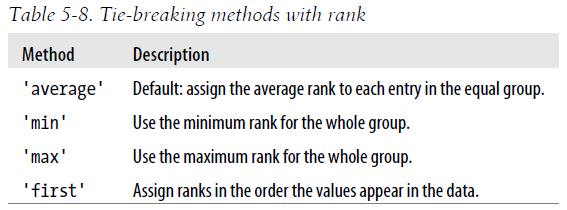

In [94]:
# 순위의 동률을 처리하는 메소드
Image(bpc.Table5_8, width=450)

### <font color='brown'> Axis indexes with duplicate values </font>
> 중복 색인
> - pandas의 많은 함수(reindex 같은)에서 색인 값은 유일해야 하지만, 강제 사항은 아니다.
> - ~~허걱... 중복된 색인값이 있다는 말인데..ㅠㅠ~~

In [95]:
obj = Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
obj

a    0
a    1
b    2
b    3
c    4
dtype: int32

In [96]:
obj.index.is_unique

False

In [97]:
obj['a']

a    0
a    1
dtype: int32

In [98]:
obj['c']

4

In [99]:
df = DataFrame(np.random.randn(4, 3), index=['a', 'a', 'b', 'b'])
df

,0,1,2
a,-0.181906,0.959783,-0.353869
a,1.001838,0.650528,-2.024275
b,0.475098,-0.227254,-0.103425
b,-0.078228,-0.144226,0.892488


In [100]:
df.loc['b']

,0,1,2
b,0.475098,-0.227254,-0.103425
b,-0.078228,-0.144226,0.892488


<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>